<a href="https://colab.research.google.com/github/GergelyTuri/tFC-rig/blob/main/Analysis/tfcrig/Updated_analysis_pipeline.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Trace Fear Conditioning Analysis Pipeline

This notebook is a prototype for an analysis pipeline for the Trace Fear Conditioning rig:

* <https://github.com/GergelyTuri/tFC-rig>

The goal of the pipeline and its supporting code is to:

* Fix inconsistent folder and file names
* Inspect data for inconsistencies (and fix some of these)
* Extract features from the data into a usable format (Pandas data frames)
* Provide a variety of exploratory or numerical data analysis tools to gain potential insights from the data

## Assumptions

The analysis pipeline code makes the following assumptions:

* You are executing the code from a Google Colaboratory notebook
* Your data is stored on Google Drive

## Notebook Setup

Using the `tFC-rig` analysis pipeline code requires a few notebook-specific steps. This section will typically be copied into any notebook analysing rig data.

In [ ]:
import os
import sys

# NOTE: if you change this, you may be breaking certain assumptions this
# code was developed on. Consider stepping through each section carefully and
# avoiding renaming any files or directories until observing the data file name
# patterns
DATA_ROOT = "/gdrive/Shareddrives/Turi_lab/Data/aging_project/"

# Google Colaboratory executes in an environment with a file system
# that has a Linux topography, but where the user should work under
# the `/content` directory
COLAB_ROOT = "/content"

REPO_URL = "https://github.com/GergelyTuri/tFC-rig.git"
REPO_ROOT = os.path.join(COLAB_ROOT, REPO_URL.split("/")[-1].split(".")[0])
REPO_BRANCH = "austin/analysis"

# Clones the `tFC-rig` repository at `/content/tFC-rig`
if not os.path.exists(REPO_ROOT):
  os.chdir(COLAB_ROOT)
  !git clone {REPO_URL}

# Pulls the latest code from the provided branch and adds the
# analysis pipeline source code to the Python system path
os.chdir(REPO_ROOT)
!git pull
!git checkout {REPO_BRANCH}
sys.path.append(os.path.join(REPO_ROOT, "Analysis"))
os.chdir(COLAB_ROOT)

Already up to date.
Already on 'austin/analysis'
Your branch is up to date with 'origin/austin/analysis'.


Grant google colab all permissions - the permissions are revoked after the session ends anyway

In [ ]:
from tfcrig.notebook import Notebook

notebook = Notebook(
    file_root=COLAB_ROOT,
    repo_url=REPO_URL,
    repo_root=REPO_ROOT,
    repo_branch=REPO_BRANCH,
    data_root=DATA_ROOT,
    max_cell_height=1000,
)
notebook.setup()

Mounted at /gdrive


# Test - add whatever you wanna test

Emergency restore files from raw.json

In [ ]:
# This restores all the files in case they accidentally get deleted
# Duplicates raw.json files and renames them to .json

import shutil
data_root: str = "/gdrive/Shareddrives/Turi_lab/Data/aging_project/"

# for root, _, files in os.walk(data_root):
#     for file in files:
#         full_file = os.path.join(root, file)
#         if full_file.endswith("_raw.json") and ('V_94(1235)_95(1235)_96(135)_97(125)' in full_file or 'VI_98(125)_100(123)_102(1235)_103(125)' in full_file):
#           print(full_file)
#           # Make a copy of the file
#           nonraw = full_file.replace("_raw.json", ".json")
#           print(f"Created a copy of {full_file}")
#           shutil.copy(full_file, nonraw)

Testing for syncing second mouse data

In [ ]:
# Testing the syncing of second mice
# To test this, go to your files on the left hand side of the screen. You have to copy and paste the code inside tFC-rig
# OR you can update the branch above (austin/analysis) and push it to github, then re-run the code above

# after updating file check changes in the drive

import importlib
import tfcrig.analysis
import tfcrig.files

importlib.reload(tfcrig.analysis) # Reloads and applies any changes made in the file on google colab
importlib.reload(tfcrig.files)    # Reloads and applies any changes made in the file on google colab


from tfcrig.analysis import Analysis
from tfcrig.files import RigFiles

files = RigFiles(
    data_root=DATA_ROOT,
    # Can select any set of cohorts here
    cohorts=["I", "II", "III", "IV", "V", "VI", "VII"],
    dry_run=False,
)

# Uncomment to test second mouse sync
# files.sync()

# Note that a subset of cohorts can be chosen for analysis
# analysis = Analysis(
#     data_root=DATA_ROOT,
#     verbose=False,
#     cohorts=["VI", "VII"],
# )

>2024-10-21 00:29:16: NumExpr defaulting to 2 threads.


Testing data imports for cohort mouse info

In [ ]:
# import seaborn as sns
# import matplotlib.pyplot as plt

# import pandas as pd
# import json
# import numpy as np

# # Please add URL for any other cohort info you'd like to import
# # df V Info
# df_V_age = pd.read_csv("https://docs.google.com/spreadsheets/d/15mHAizq8x-OahCtmPcd2pDXwLv2sf44apiElFfdP-KQ/export?format=csv&gid=0",
#                    # Set first column as rownames in data frame
#                    index_col=0)
# # Cohort VI Info
# df_VI_age = pd.read_csv("https://docs.google.com/spreadsheets/d/1tog65aaQBl6NpPd16Pf9TDnSjQnv-XRK9lLKwppO2qs/export?format=csv&gid=0",
#                    # Set first column as rownames in data frame
#                    index_col=0)



# df_VI_age = df_VI_age[df_VI_age['mouse_id'] != '103_5']

# # Define mouse IDs for both cohorts
# mouse_ids_V = ["94_1", "94_2", "94_3", "94_5", "95_1", "95_2", "95_3", "95_5",
#                "96_1", "96_3", "96_5", "97_1", "97_2", "97_5"]
# mouse_ids_VI = ["98_1", "98_2", "98_5", "100_1", "100_2", "100_3", "102_1",
#                 "102_2", "102_3", "102_5", "103_1", "103_2"]

# df = analysis.df.copy().sort_values(by=["session_id", "mouse_id"])
# df['session_id'] = df['session_id'] // 1000000

# # Filter and merge cohort V data
# df_V = df[df["mouse_id"].isin(mouse_ids_V)]
# df_V = pd.merge(df_V, df_V_age, on='mouse_id', how='left')

# # Filter and merge cohort VI data
# df_VI = df[df["mouse_id"].isin(mouse_ids_VI)]
# df_VI = pd.merge(df_VI, df_VI_age, on='mouse_id', how='left')

# # Combine both cohorts
# df_V_VI = pd.concat([df_V, df_VI], axis=0)
# df_V_VI_before = df_V_VI[df_V_VI['session_id'].isin([V_before_puff, VI_before_puff])]
# df_V_VI_before.to_csv('analysis_df_original.csv', index=True)


# Data Prep/Preprocessing

Check, prep, and clean data

## File cleaning pipeline - uncomment and run if files need to be cleaned

There is no need to run this multiple times, you can run once to save time

In [ ]:
import tfcrig.files

importlib.reload(tfcrig.files)    # Reloads and applies any changes made in the file on google colab

from tfcrig.files import RigFiles

files = RigFiles(
    data_root=DATA_ROOT,
    dry_run=False,
)
# files.check()
# files.prep()
# files.sync()
# files.clean()

## Analysis

Define an analysis, which extracts features from the data and provides plotting methods to visualize and analyze the data. This requires pulling and processing data from all files, and can therefore be time consuming.

In [ ]:
"""
Analysis.data gives you the step-by-step output from the rig, including session_id, absolute_time, message
Analysis.df contains preprocessed features such as normalized lick rate
"""

import importlib
import tfcrig.analysis

importlib.reload(tfcrig.analysis) # Reloads and applies any changes made in the file on google colab

from tfcrig.analysis import Analysis

analysis = Analysis(
    data_root=DATA_ROOT,
    verbose=False
)

>2024-10-21 00:34:15: Session either does not start or does not end!!!
 - 74_3_2023-11-16_13-24-07.json
 - 75_1_75_2_2024-01-04_12-06-21.json
 - 75_4_75_5_2024-01-03_13-24-34.json
 - 75_5_75_4_2024-01-04_12-43-24.json
 - 90_5_91_1_2024-04-29_13-26-00.json
 - 95_1_95_2_2024-07-31_14-24-15.json
 - 95_1_95_2_2024-07-31_14-34-34.json
>2024-10-21 00:34:15: Time did not move forwards!
 - 74_1_74_2_2023-12-29_13-40-34.json
 - 75_1_75_2_2024-01-04_12-09-06.json
 - 75_1_75_2_2024-01-04_12-48-51.json
 - 88_1_88_2_2024-04-24_14-06-25.json
 - 90_1_90_2_2024-04-16_14-32-20.json
>2024-10-21 00:34:15: Invalid trial type in: 'currentTrialType: -48'!!!
 - 74_1_2023-11-15_10-11-03.json
 - 74_2_2023-11-15_10-22-32.json
 - 74_3_2023-11-15_10-32-50.json
 - 74_4_2023-11-15_10-44-49.json
 - 74_5_2023-11-15_10-56-02.json
>2024-10-21 00:34:15: File name does not match its 'mouse_ids': /gdrive/Shareddrives/Turi_lab/Data/aging_project/II_74_1,2,3,4,5/74_5/2023_11_16/74_5_2023-11-16_13-00-33.json
 - 74_5_2023-11-

# Data Exploration

Exploring data

#### Helper functions for analysis/statistics

In [ ]:
def type_diffs(df, col1, col2, no_signal=False):
    if no_signal:
      df = df[['mouse_id', 'Age', 'No Signal', col1, col2]]
      df.loc[:, 'diff (CS- vs ITI)'] = df[col1] - df[col2]
      # Group by Age and sum the differences for each group
      sum_diffs_by_age = df.groupby('Age')['diff (CS- vs ITI)'].sum().reset_index()
    else:
      df = df[['mouse_id', 'Age', col1, col2]]
      # Create a new column for the difference between CS- and ITI
      df.loc[:, 'diff'] = df[col1] - df[col2]
      # Group by Age and sum the differences for each group
      sum_diffs_by_age = df.groupby('Age')['diff'].sum().reset_index()

    return df, sum_diffs_by_age

def calculate_stats(df, col1, col2):
    df = df[['mouse_id', 'Age', col1, col2]]
    stats = df.groupby('Age').agg({
        col1: ['mean', 'std', 'min', 'max', 'median'],
        col2: ['mean', 'std', 'min', 'max', 'median']
    })
    # Display the calculated statistics
    return stats

## Licks over time

### Get dataframe from analysis pipeline and merge with cohort info

Analysis.data - rig output data

In [ ]:
import pandas as pd
from datetime import datetime

data = analysis.data.copy()
data['session_id'] = data['session_id'] // 1000000


"""
Please add URL for any other cohort info you'd like to import
"""

# df V Info
df_V_age = pd.read_csv("https://docs.google.com/spreadsheets/d/15mHAizq8x-OahCtmPcd2pDXwLv2sf44apiElFfdP-KQ/export?format=csv&gid=0")
# Cohort VI Info
df_VI_age = pd.read_csv("https://docs.google.com/spreadsheets/d/1tog65aaQBl6NpPd16Pf9TDnSjQnv-XRK9lLKwppO2qs/export?format=csv&gid=0")

# Rename columns and remove bad mouse data
df_V_age = df_V_age.rename(columns={'ID': 'mouse_id', 'Age ': 'Age'})[['mouse_id', 'Age', 'Puff Day']]
df_VI_age = df_VI_age.rename(columns={'ID': 'mouse_id', 'Age ': 'Age'})[['mouse_id', 'Age', 'Puff Day']]
df_VI_age = df_VI_age[df_VI_age['mouse_id'] != '103_5']

# mouse IDs for each cohort
mouse_ids_V = list(df_V_age['mouse_id'])
mouse_ids_VI = list(df_VI_age['mouse_id'])

"""
Update puff_day array if adding a new cohort - initialize a new variable and add to puff_days array
"""
V_puff_day = int(datetime.strptime(df_V_age['Puff Day'][0], "%m/%d/%y").strftime("%Y%m%d"))
VI_puff_day = int(datetime.strptime(df_VI_age['Puff Day'][0], "%m/%d/%y").strftime("%Y%m%d"))
puff_days = [V_puff_day, VI_puff_day]

# Merge Analysis dataframe with cohort info (we want to append age and puff day to original dataframe)

df_ages = pd.concat([df_V_age, df_VI_age], axis=0)
df_ages['Puff Day'] = pd.to_datetime(df_ages['Puff Day'], format='%m/%d/%y').dt.strftime('%Y%m%d')
data = data[data['mouse_id'].isin(mouse_ids_V + mouse_ids_VI)]
# data = data[data['session_id'].isin(puff_days)]
data = pd.merge(data, df_ages, on='mouse_id', how='left')


"""
View/filter your dataframe as needed
"""
# data[data['message']!='Waiting for session to start...']
# data[(data['message'].str.contains('NUMBER_OF_TRIALS', na=False)) | (df['message'].str.contains('trialTypesChar', na=False)) | (df['message']=='lick')]
# data[(data['message'].str.contains('AIR_PUFF_START_TIME', na=False))]
# data[data['puffed_lick']==1]
# data[data['puffed_lick']==1]
data
print(V_puff_day)
data[data['session_id']==V_puff_day]


>2024-10-21 00:34:20: 20240807


,mouse_id,session_id,date,day_of_week,absolute_time,trial,session_time,trial_time,message,is_session,is_trial,trial_type,lick,puffed_lick,negative_signal,positive_signal,water,Age,Puff Day
401092,94_1,20240807,2024-08-07 10:41:12,Wednesday,2024-08-07 10:41:27.681039,0,103,0,Waiting for session to start...,0,0,-1,0,0,0,0,0,Young,20240807
401093,94_1,20240807,2024-08-07 10:41:12,Wednesday,2024-08-07 10:41:27.681039,0,204,0,Waiting for session to start...,0,0,-1,0,0,0,0,0,Young,20240807
401094,94_1,20240807,2024-08-07 10:41:12,Wednesday,2024-08-07 10:41:27.696661,0,305,0,Waiting for session to start...,0,0,-1,0,0,0,0,0,Young,20240807
401095,94_1,20240807,2024-08-07 10:41:12,Wednesday,2024-08-07 10:41:27.696661,0,405,0,Waiting for session to start...,0,0,-1,0,0,0,0,0,Young,20240807
401096,94_1,20240807,2024-08-07 10:41:12,Wednesday,2024-08-07 10:41:27.696661,0,505,0,Waiting for session to start...,0,0,-1,0,0,0,0,0,Young,20240807
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
445890,97_5,20240807,2024-08-07 15:29:04,Wednesday,2024-08-07 16:00:58.733995,24,1904628,0,Negative signal stop via trial flush,1,0,-1,0,0,0,0,0,Aged,20240807
445891,97_5,20240807,2024-08-07 15:29:04,Wednesday,2024-08-07 16:00:58.780861,24,1904685,0,Waiting after the last trial: 60000,1,0,-1,0,0,0,0,0,Aged,20240807
445892,97_5,20240807,2024-08-07 15:29:04,Wednesday,2024-08-07 16:01:59.357452,24,1965246,0,Water off via trial flush,1,0,-1,0,0,0,0,0,Aged,20240807
445893,97_5,20240807,2024-08-07 15:29:04,Wednesday,2024-08-07 16:01:59.394141,24,1965247,0,Session has ended,0,0,-1,0,0,0,0,0,Aged,20240807


Analysis.df - preprocessed features

In [ ]:
df = analysis.df.copy().sort_values(by=["session_id", "mouse_id"])
df['session_id'] = df['session_id'] // 1000000

# Filter and merge cohort V data
df_V = df[df["mouse_id"].isin(mouse_ids_V)]
df_V = pd.merge(df_V, df_V_age, on='mouse_id', how='left')

df_V = df_V[['mouse_id', 'session_id', 'Age', 'z_avg_lick_freq_csminus', 'z_avg_lick_freq_iti', 'z_avg_lick_freq_csplus', 'z_avg_lick_freq_no_signal', 'total_puffed_licks', 'z_total_puffed_licks_in_trial', 'z_total_puffed_licks_type_0', 'z_total_puffed_licks_type_1']].rename(
    columns={'z_avg_lick_freq_csminus': 'CS-', 'z_avg_lick_freq_iti': 'ITI', 'z_avg_lick_freq_csplus': 'CS+', 'z_avg_lick_freq_no_signal': 'No Signal'})


# Filter and merge cohort VI data
df_VI = df[df["mouse_id"].isin(mouse_ids_VI)]
df_VI = pd.merge(df_VI, df_VI_age, on='mouse_id', how='left')
df_VI = df_VI[['mouse_id', 'session_id', 'Age', 'z_avg_lick_freq_csminus', 'z_avg_lick_freq_iti', 'z_avg_lick_freq_csplus', 'z_avg_lick_freq_no_signal']].rename(
    columns={'z_avg_lick_freq_csminus': 'CS-', 'z_avg_lick_freq_iti': 'ITI', 'z_avg_lick_freq_csplus': 'CS+', 'z_avg_lick_freq_no_signal': 'No Signal'})

# Combine both cohorts
df_V_VI = pd.concat([df_V, df_VI], axis=0)

# Get session IDs for before and after puff events
V_before_puff = V_puff_day-1
V_after_puff = V_puff_day+1

VI_before_puff = VI_puff_day-1
VI_after_puff = VI_puff_day+1

V_days = df_V['session_id'].unique()
VI_days = df_VI['session_id'].unique()
V_before_puff_all = V_days[V_days < V_puff_day]
VI_before_puff_all = VI_days[VI_days < VI_puff_day]

"""
Filter dataframe for specific sessions
"""

# Filter for before and after puff sessions
df_V_VI_before = df_V_VI[df_V_VI['session_id'].isin([V_before_puff, VI_before_puff])]
df_V_VI_after = df_V_VI[df_V_VI['session_id'].isin([V_after_puff, VI_after_puff])]

# Concatenate before and after data
df_V_before = df_V_VI[df_V_VI['session_id'].isin([V_before_puff])]
df_V_after = df_V_VI[df_V_VI['session_id'].isin([V_after_puff])]

df_VI_before = df_V_VI[df_V_VI['session_id'].isin([VI_before_puff])]
df_VI_after = df_V_VI[df_V_VI['session_id'].isin([VI_after_puff])]

df_V_puff = df_V[df_V['session_id'].isin([V_puff_day])]
df_VI_puff = df_VI[df_VI['session_id'].isin([VI_puff_day])]


# df_V_VI_before.to_csv('analysis_df.csv', index=True)


df_V_VI

,mouse_id,session_id,Age,CS-,ITI,CS+,No Signal,total_puffed_licks,z_total_puffed_licks_in_trial,z_total_puffed_licks_type_0,z_total_puffed_licks_type_1
0,94_1,20240730,Young,4.456343,0.000000,NaN,NaN,0.0,NaN,NaN,NaN
1,94_2,20240730,Young,25.057317,0.000000,NaN,NaN,0.0,NaN,NaN,NaN
2,94_3,20240730,Young,2.919766,0.000000,NaN,NaN,0.0,NaN,NaN,NaN
3,94_5,20240730,Young,5.132645,0.000000,NaN,NaN,0.0,NaN,NaN,NaN
4,95_1,20240730,Young,39.426936,0.000000,NaN,NaN,0.0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
83,102_2,20240906,Aged,2.812213,1.985388,2.263845,NaN,NaN,NaN,NaN,NaN
84,102_3,20240906,Aged,2.471221,1.600613,2.428386,NaN,NaN,NaN,NaN,NaN
85,102_5,20240906,Aged,4.274355,1.810743,2.512147,NaN,NaN,NaN,NaN,NaN
86,103_1,20240906,Aged,3.243909,1.922601,3.520843,NaN,NaN,NaN,NaN,NaN


Compare the two dataframes

In [ ]:
print(data.columns)
print(df_V_VI.columns)

>2024-10-21 00:34:22: Index(['mouse_id', 'session_id', 'date', 'day_of_week', 'absolute_time',
       'trial', 'session_time', 'trial_time', 'message', 'is_session',
       'is_trial', 'trial_type', 'lick', 'puffed_lick', 'negative_signal',
       'positive_signal', 'water', 'Age', 'Puff Day'],
      dtype='object')
>2024-10-21 00:34:22: Index(['mouse_id', 'session_id', 'Age', 'CS-', 'ITI', 'CS+', 'No Signal',
       'total_puffed_licks', 'z_total_puffed_licks_in_trial',
       'z_total_puffed_licks_type_0', 'z_total_puffed_licks_type_1'],
      dtype='object')


### Licks over time plot

'\nSave single plot\n'

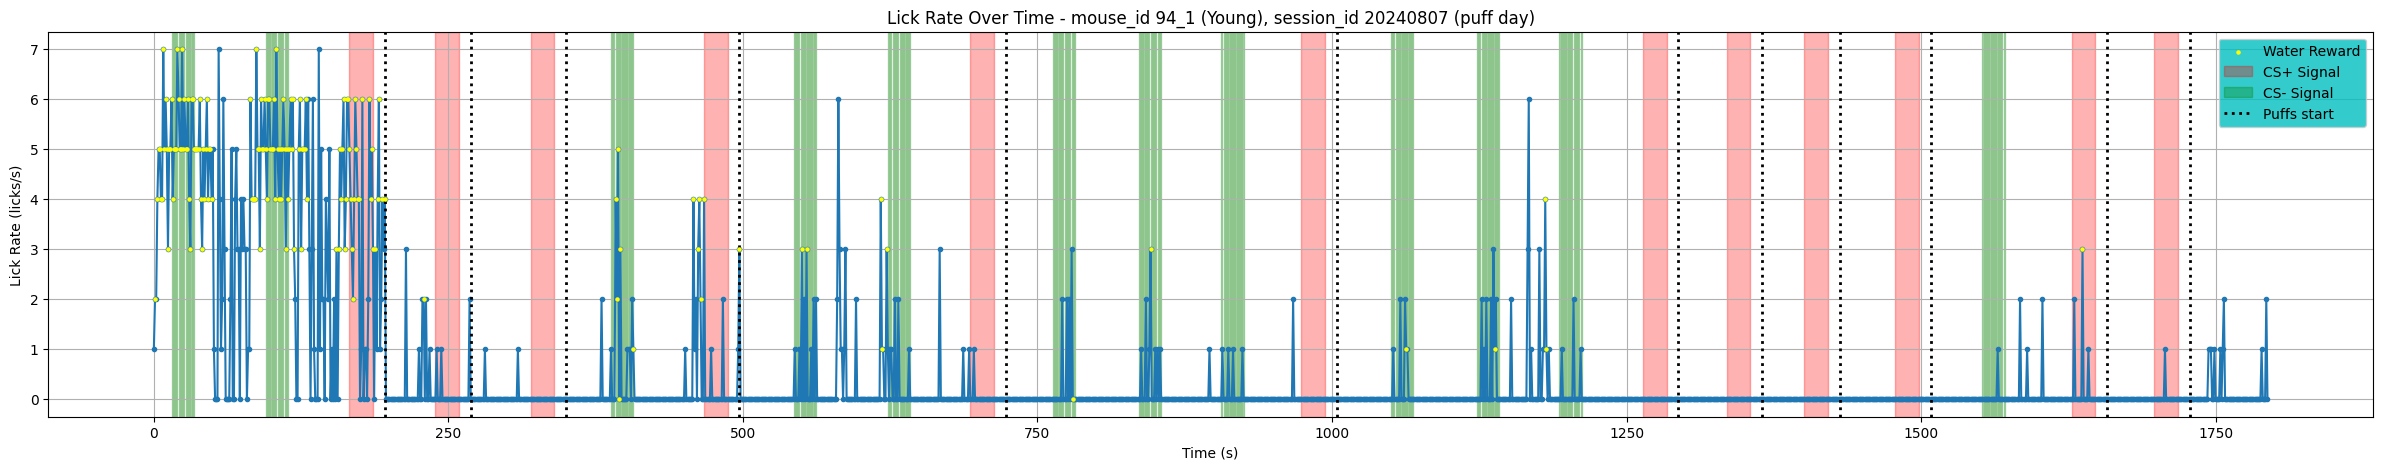

In [ ]:
import matplotlib.pyplot as plt

START_STRING = "Session has started"
def licks_over_time(df, mouse_id, session_id, ax=None):
  """
  Plot for lick rate over time.

  """

  df = df[df['mouse_id']==mouse_id]
  df = df[df['session_id']==session_id]

  df['absolute_time'] = pd.to_datetime(df['absolute_time'], format='%Y-%m-%d_%H-%M-%S.%f')
  session_index = df.index[df['message'].str.contains(START_STRING)].min()
  df['Time (s)'] = (df['absolute_time'] - df.loc[session_index, 'absolute_time']).dt.total_seconds().astype(int)
  df = df.loc[session_index:]

  licks_per_second = df.groupby('Time (s)')['lick'].sum().reset_index()

  complete_time_range = pd.DataFrame({'Time (s)': range(licks_per_second['Time (s)'].min(), licks_per_second['Time (s)'].max() + 1)})

  licks_per_second = complete_time_range.merge(licks_per_second, on='Time (s)', how='left').fillna(0)
  licks_per_second['lick'] = licks_per_second['lick'].astype(int)
  # print(len(licks_per_second["Time (s)"]))
  if ax is None:
        fig, ax = plt.subplots(figsize=(30, 5))
  ax.plot(licks_per_second["Time (s)"], licks_per_second["lick"], marker='.', linestyle='-')

  # Marking water rewards
  water_events = df.groupby('Time (s)')['water'].sum().reset_index()
  water_reward_times = water_events[water_events['water'] > 0]["Time (s)"]
  for time_point in water_reward_times:
      lick_count = licks_per_second[licks_per_second['Time (s)'] == time_point]['lick'].values[0]
      ax.scatter(time_point, lick_count, color='yellow', s=5, zorder=5, label='Water Reward' if time_point == water_reward_times.min() else "")

  # Shading for positive signals (CS+)
  positive_signal_starts = df[df['message'] == "Positive signal start"]['Time (s)'].values
  positive_signal_stops = df[df['message'] == "Positive signal stop"]['Time (s)'].values
  for start, stop in zip(positive_signal_starts, positive_signal_stops):
      ax.axvspan(start, stop, color='red', alpha=0.3, label='CS+ Signal' if start == positive_signal_starts.min() else "")

  # Shading for negative signals (CS-)
  negative_signal_starts = df[df['message'] == "Negative signal start"]['Time (s)'].values
  negative_signal_stops = df[df['message'] == "Negative signal stop"]['Time (s)'].values
  for start, stop in zip(negative_signal_starts, negative_signal_stops):
      ax.axvspan(start, stop, color='green', alpha=0.3, label='CS- Signal' if start == negative_signal_starts.min() else "")

  # Marking puffs
  puff_times = df[df['message'] == "Puff start"]['Time (s)']
  first_puffs = []
  last_puff_time = 0
  for i in puff_times:
    if last_puff_time + 20 < i:
      first_puffs.append(i)
      last_puff_time = i
  for signal_time in first_puffs:
        ax.axvline(x=signal_time, color='black', linestyle='dotted', linewidth=2, label='Puffs start' if signal_time == first_puffs[0] else "")

  # Refine visuals - add axes, legend, title, and grid
  ax.set_xlabel('Time (s)')
  ax.set_ylabel('Lick Rate (licks/s)')
  ax.legend(facecolor='c')
  puff_title = 'puff day' if session_id in puff_days else 'after puff day'
  age = df["Age"].iloc[0]
  ax.set_title(f'Lick Rate Over Time - mouse_id {mouse_id} ({age}), session_id {session_id} ({puff_title})')
  ax.grid(True)


"""
  Run and save plot for every mouse in cohort VI:
"""
# for mouse in mouse_ids_VI:
#   fig, axs = plt.subplots(2, 1, figsize=(30, 10), sharex=True)

#   licks_over_time(data, mouse, VI_puff_day, ax=axs[0])
#   licks_over_time(data, mouse, VI_puff_day+1, ax=axs[1])
#   plt.tight_layout()

#   plt.rcParams["svg.fonttype"] = "none"
#   for axis in plt.gcf().get_axes():
#       axis.set_rasterized(False)
#   plt.savefig(f'lick_rate_{mouse}_puff_day_and_after.svg', format='svg')

"""
Single plot
"""

licks_over_time(data, '94_1', V_puff_day)
# licks_over_time(data, '97_5', V_puff_day+1)

"""
Save single plot
"""
# plt.rcParams["svg.fonttype"] = "none"
# for axis in plt.gcf().get_axes():
#     axis.set_rasterized(False)
# plt.savefig(f'lick_rate.svg', format='svg')


## Scatterplots

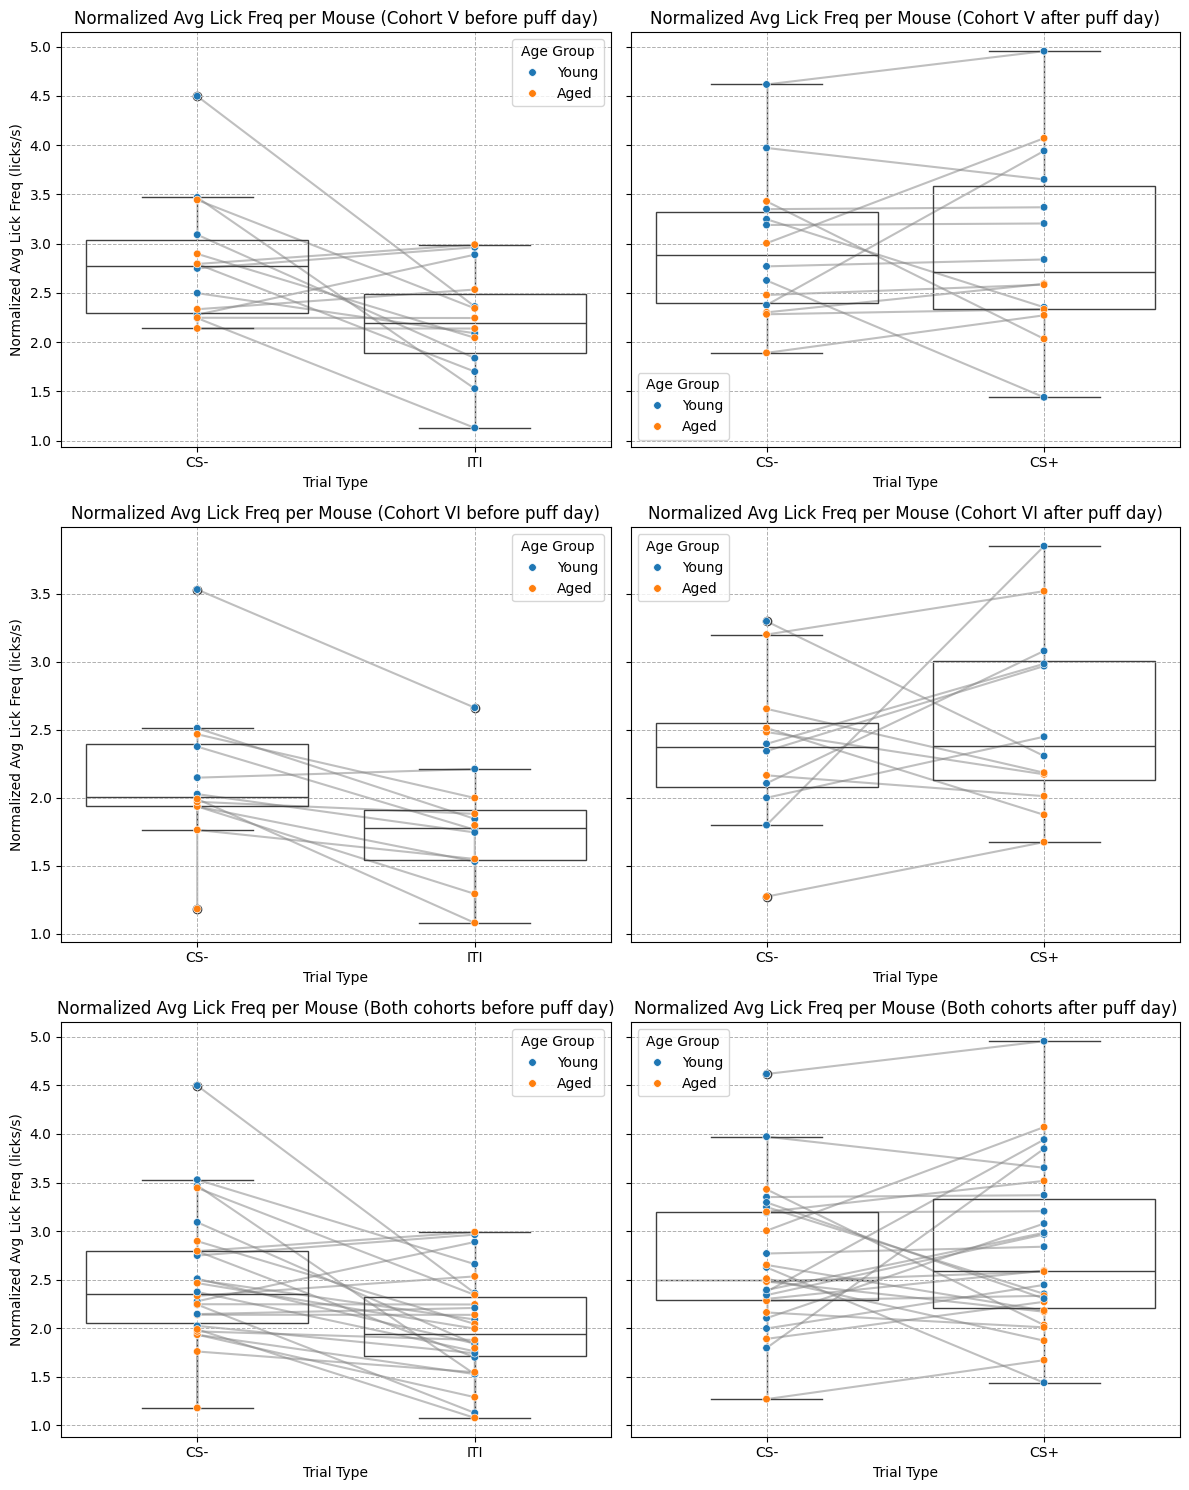

'\nIndividual plot\n'

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

def scatterplot(df, title, ITI, no_signal=False, puff_day=False, fontsize = 12, ax=None):
    # Melt the DataFrame to have "Type" and "Licks" columns
    y_arg_2 = 'ITI' if ITI else 'CS+'
    if no_signal:
      df_melt = df.melt(
        id_vars=["mouse_id", "Age"],
        value_vars=["No Signal"],
        var_name="Type",
        value_name="Licks"
      )
    elif puff_day:
      df_melt = df.melt(
          id_vars=["mouse_id", "Age"],
          value_vars=["CS-", "ITI", "CS+"],
          var_name="Type",
          value_name="Licks"
      )
    else:
      df_melt = df.melt(
          id_vars=["mouse_id", "Age"],
          value_vars=["CS-", y_arg_2],
          var_name="Type",
          value_name="Licks"
      )

    # Create a new figure and axis if ax is None
    if ax is None:
        fig, ax = plt.subplots(figsize=(6, 4))

    sns.boxplot(data=df_melt, x="Type", y="Licks", ax=ax, boxprops={'facecolor':'None'}, whiskerprops={'linewidth':1}, zorder=1)

    # Create the scatter plot on the specified axes
    sns.scatterplot(data=df_melt, x="Type", y="Licks", hue="Age", ax=ax, s=30, zorder=2)

    for mouse_id in df_melt['mouse_id'].unique():
        mouse_data = df_melt[df_melt['mouse_id'] == mouse_id]
        ax.plot(mouse_data['Type'], mouse_data['Licks'], color='gray', alpha=0.5, zorder=0)

    ax.grid(which='both', linestyle='--', linewidth=0.7)

    # Add labels and title
    ax.set_xlabel("Trial Type")
    ax.set_ylabel("Normalized Avg Lick Freq (licks/s)")
    ax.set_title(title, fontsize=fontsize)
    ax.legend(title="Age Group")

    if ax is None:
        plt.tight_layout()


# Create a 2x2 subplot grid
fig, axs = plt.subplots(3, 2, figsize=(12, 15), sharey='row')

# Call the scatterplot function for each subplot
scatterplot(df_V_before, 'Normalized Avg Lick Freq per Mouse (Cohort V before puff day)', ITI=True, ax=axs[0, 0])
scatterplot(df_V_after, 'Normalized Avg Lick Freq per Mouse (Cohort V after puff day)', ITI=False, ax=axs[0, 1])
scatterplot(df_VI_before, 'Normalized Avg Lick Freq per Mouse (Cohort VI before puff day)', ITI=True, ax=axs[1, 0])
scatterplot(df_VI_after, 'Normalized Avg Lick Freq per Mouse (Cohort VI after puff day)', ITI=False, ax=axs[1, 1])

scatterplot(df_V_VI_before, 'Normalized Avg Lick Freq per Mouse (Both cohorts before puff day)', ITI=True, ax=axs[2, 0])
scatterplot(df_V_VI_after, 'Normalized Avg Lick Freq per Mouse (Both cohorts after puff day)', ITI=False, ax=axs[2, 1])

# Adjust layout
plt.tight_layout()
plt.show()

"""
Individual plot
"""

# scatterplot(df_V_before, 'Normalized Avg Lick Freq per Mouse (Cohort V before puff day)', ITI=True)


Puff day scatterplot

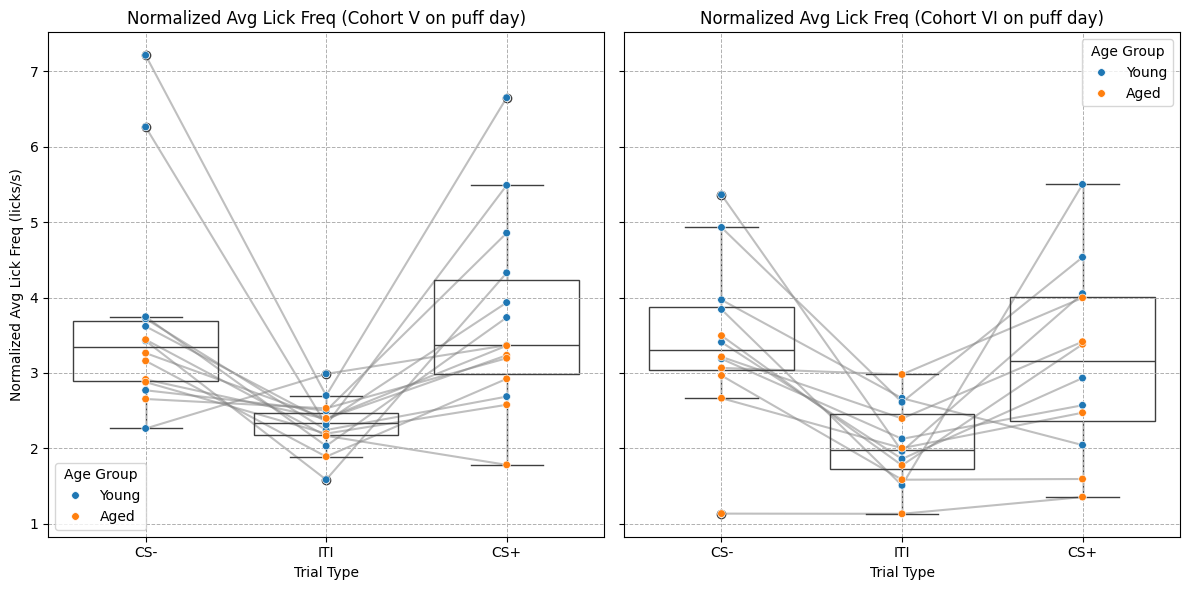

In [ ]:
fig, axs = plt.subplots(1, 2, figsize=(12, 6), sharey='row')

scatterplot(df_V_puff, 'Normalized Avg Lick Freq (Cohort V on puff day)', ITI=False, puff_day=True, ax=axs[0])
scatterplot(df_VI_puff, 'Normalized Avg Lick Freq (Cohort VI on puff day)', ITI=False, puff_day=True, ax=axs[1])

plt.tight_layout()
plt.show()

Cohorts V & VI 2 days before puff day

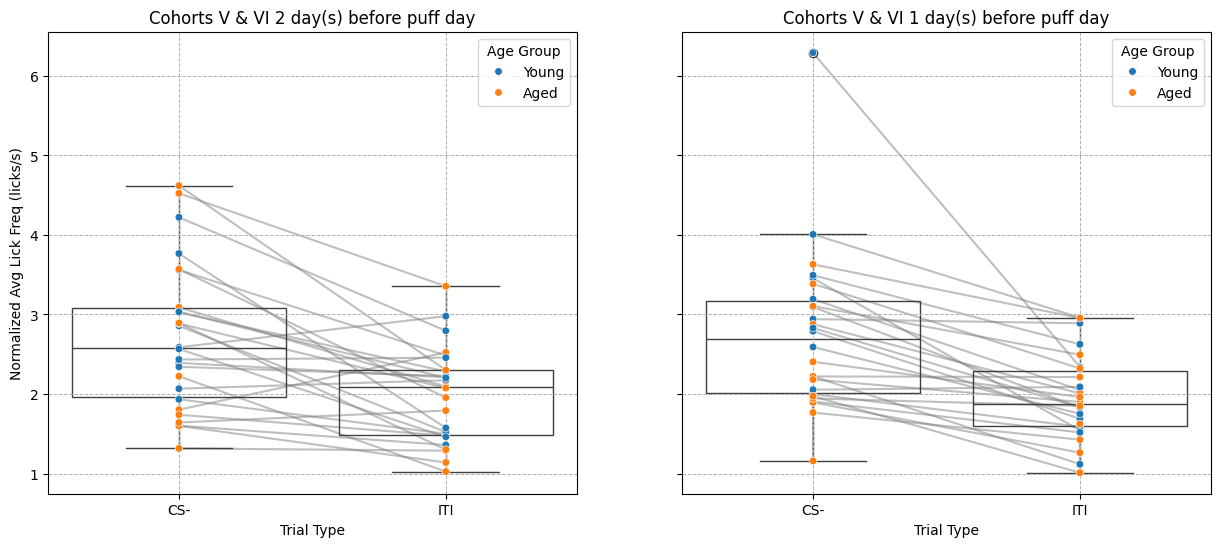

In [ ]:
from datetime import datetime
import pandas as pd

"""
Import this file by dragging into Files on the left
"""
data = pd.read_csv('/content/Cohort V and VI 2 days pre-learning - Sheet1.csv')

fig, axs = plt.subplots(1, 2, figsize=(15, 6), sharey='row')
x = 0
for i in [2,1]:
  sub_data = data[data['day(before puff day)']==i]
  scatterplot(sub_data, f'Cohorts V & VI {i} day(s) before puff day', ITI=True, fontsize=12, ax=axs[x])
  x+=1

plt.rcParams["svg.fonttype"] = "none"
for axis in fig.get_axes():
    axis.set_rasterized(False)
fig.savefig(f'V_VI_2_days_before_puff.svg', format='svg')
plt.show()  # Show the plot (optional)

# # Adjust layout
# plt.tight_layout()
# plt.savefig('V_all_days_before_puff.svg', format='svg')
# plt.show()

Cohort V scatterplot all days before puff day

<ipython-input-10-05c488d76857>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[:, 'diff (CS- vs ITI)'] = df[col1] - df[col2]
<ipython-input-10-05c488d76857>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[:, 'diff (CS- vs ITI)'] = df[col1] - df[col2]
<ipython-input-10-05c488d76857>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.

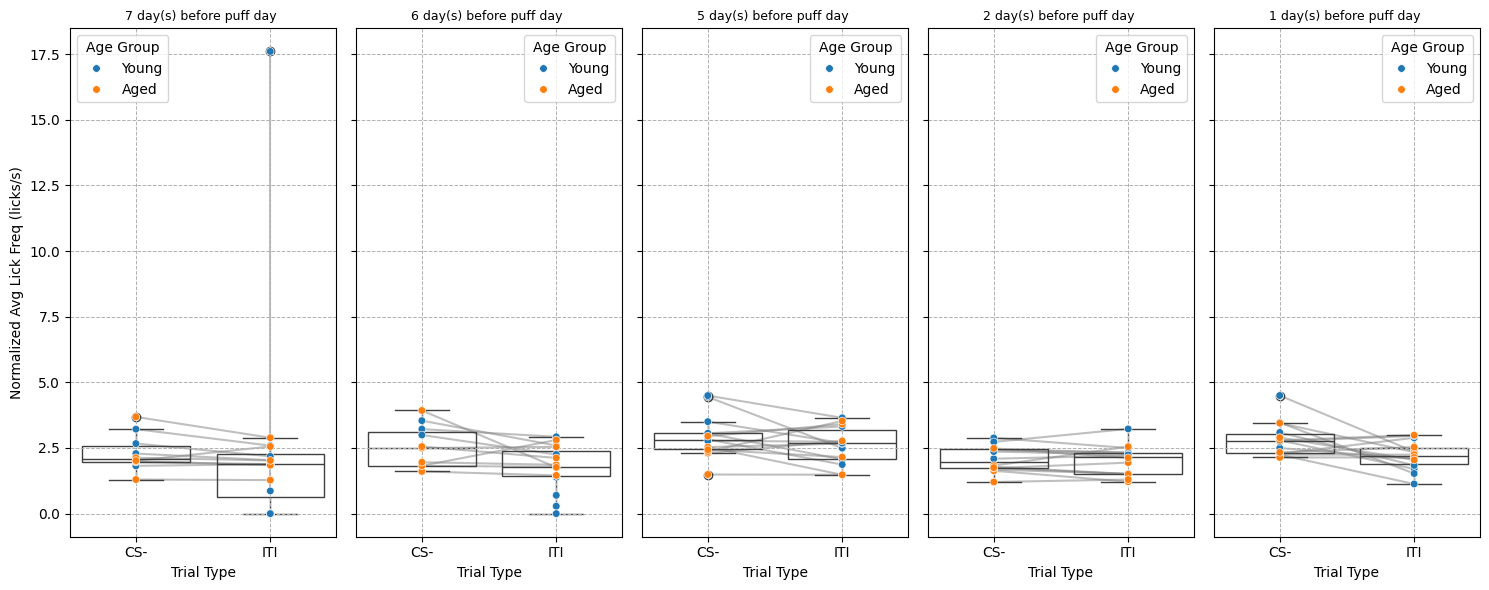

In [ ]:
from datetime import datetime


fig, axs = plt.subplots(1, 5, figsize=(15, 6), sharey='row')
x = 0
for i in V_before_puff_all:
  data = df_V_VI[df_V_VI['session_id'].isin([i])]
  # data = data[data['CS-'] <= 10]
  days_before_puff = (datetime.strptime(str(V_puff_day), "%Y%m%d")-datetime.strptime(str(i), "%Y%m%d")).days
  if i == 20240730:
    training_day = '(lick training day)'
    continue
  else:
    training_day = ''
    # stats = calculate_stats(data, 'CS-', 'ITI')
    df_diff, diff = type_diffs(data, 'CS-', 'ITI', no_signal=True)
    # stats.to_csv(f'stats{i}.csv', index=True)
    # diff.to_csv(f'diff{i}.csv', index=False)
    df_diff.to_csv(f'data{i}.csv', index=False)

  scatterplot(data, f'{days_before_puff} day(s) before puff day {training_day}', ITI=True, fontsize=9, ax=axs[x])
  x+=1

# Adjust layout
plt.tight_layout()
plt.savefig('V_all_days_before_puff.svg', format='svg')
plt.show()

Cohort VI scatterplot all days before puff day

In [ ]:
# Lfig, axs = plt.subplots(1, 5, figsize=(15, 6), sharey='row')
# x = 0
# for i in VI_before_puff_all:
#   data = df_V_VI[df_V_VI['session_id'].isin([i])]
#   days_before_puff = (datetime.strptime(str(VI_puff_day), "%Y%m%d")-datetime.strptime(str(i), "%Y%m%d")).days
#   if i in [20240827, 20240828, 20240829]:
#     no_signal = True
#     data = data[data['No Signal']<100]
#   else:
#     no_signal = False
#   scatterplot(data, f'{days_before_puff} day(s) before puff day', ITI=True, no_signal=no_signal, ax=axs[x])
#   x+=1

# # Adjust layout
# plt.tight_layout()
# plt.show()

Made a similar function scatterplot_facet, which is more useful for splitting the data by a feature (Age in this instance)

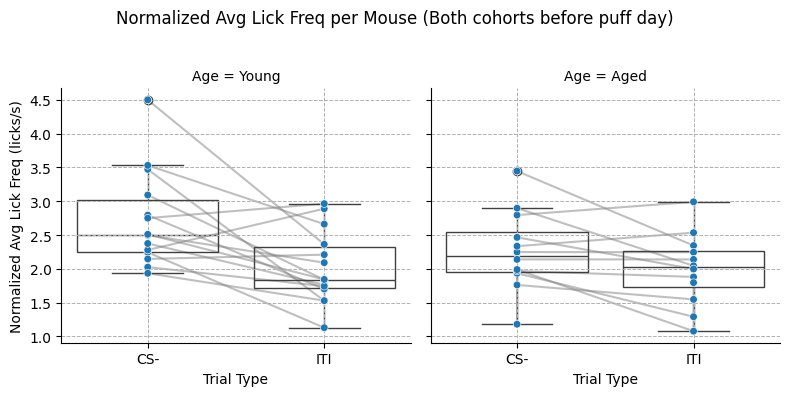

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt


def scatterplot_facet(df, title, ITI, no_signal=False, puff_day=False, download = False, ax=None):
    # Melt the DataFrame to have "Type" and "Licks" columns
    y_arg_2 = 'ITI' if ITI else 'CS+'
    if no_signal:
        df_melt = df.melt(
            id_vars=["mouse_id", "Age"],
            value_vars=["No Signal"],
            var_name="Type",
            value_name="Licks"
        )
    if puff_day:
      df_melt = df.melt(
            id_vars=["mouse_id", "Age"],
            value_vars=["CS-", "ITI", "CS+"],
            var_name="Type",
            value_name="Licks"
        )
    else:
        df_melt = df.melt(
            id_vars=["mouse_id", "Age"],
            value_vars=["CS-", y_arg_2],
            var_name="Type",
            value_name="Licks"
        )


    # Create a FacetGrid to split the plot by age
    g = sns.FacetGrid(df_melt, col="Age", height=4, aspect=1)

    # Define the plotting function
    def plot_func(data, **kwargs):
        ax = plt.gca()
        sns.boxplot(data=data, x="Type", y="Licks", ax=ax,
                    boxprops={'facecolor':'None'}, whiskerprops={'linewidth':1}, zorder=1)
        sns.scatterplot(data=data, x="Type", y="Licks", hue="Age", ax=ax, s=30, zorder=2)

        for mouse_id in data['mouse_id'].unique():
            mouse_data = data[data['mouse_id'] == mouse_id]
            ax.plot(mouse_data['Type'], mouse_data['Licks'], color='gray', alpha=0.5, zorder=0)

        ax.grid(which='both', linestyle='--', linewidth=0.7)
        ax.set_xlabel("Trial Type")
        ax.set_ylabel("Normalized Avg Lick Freq (licks/s)")

    # Map the plotting function to each subplot
    g.map_dataframe(plot_func)

    # Add a title to the entire plot
    g.fig.suptitle(title, fontsize=12)

    # Adjust layout to prevent overlap
    g.fig.tight_layout(rect=[0, 0, 1, 0.95])

    if download:
      plt.rcParams["svg.fonttype"] = "none"
      for axis in g.fig.get_axes():
          axis.set_rasterized(False)
      g.fig.savefig(f'{title}.svg', format='svg')
    # # Show the plot
    plt.show()


# Call the scatterplot function for each subplot
# scatterplot_facet(df_V_before, 'Normalized Avg Lick Freq per Mouse (Cohort V before puff day)', ITI=True)
# scatterplot_facet(df_V_after, 'Normalized Avg Lick Freq per Mouse (Cohort V after puff day)', ITI=False)
# scatterplot_facet(df_VI_before, 'Normalized Avg Lick Freq per Mouse (Cohort VI before puff day)', ITI=True)
# scatterplot_facet(df_VI_after, 'Normalized Avg Lick Freq per Mouse (Cohort VI after puff day)', ITI=False)

scatterplot_facet(df_V_VI_before, 'Normalized Avg Lick Freq per Mouse (Both cohorts before puff day)', ITI=True, download=True)
# scatterplot_facet(df_V_VI_after, 'Normalized Avg Lick Freq per Mouse (Both cohorts after puff day)', ITI=False)

# scatterplot_facet(df_V_puff, 'Normalized Avg Lick Freq (Cohort V on puff day)', ITI=True, puff_day=True)
# scatterplot_facet(df_VI_puff, 'Normalized Avg Lick Freq (Cohort VI on puff day)', ITI=False, puff_day=True)

Print and save statistics (from helper function above)

In [ ]:
stats = calculate_stats(df_V_VI_before, 'CS-', 'ITI')
df_diff, diff = type_diffs(df_V_VI_before, 'CS-', 'ITI')
print(stats)
print(df_diff)
print(diff)

"""
Save stats
"""
# stats.to_csv('stats.csv', index=True)
# df_diff.to_csv('df_diff.csv', index=False)
# diff.to_csv('diff.csv', index=False)

>2024-10-21 00:35:35:             CS-                                               ITI            \
           mean       std       min       max    median      mean       std   
Age                                                                           
Aged   2.263162  0.590410  1.180623  3.444512  2.193815  1.990669  0.528902   
Young  2.724419  0.711775  1.934034  4.497604  2.504015  2.017995  0.540483   

                                     
            min       max    median  
Age                                  
Aged   1.078291  2.990487  2.020803  
Young  1.129688  2.963904  1.840597  
>2024-10-21 00:35:35:    mouse_id    Age       CS-       ITI      diff
75     94_1  Young  2.244076  1.129688  1.114388
76     94_2  Young  2.497898  2.090840  0.407058
77     94_3  Young  2.793707  1.701440  1.092267
78     94_5  Young  2.278702  2.888553 -0.609851
79     95_1  Young  3.470585  1.528321  1.942264
80     95_2  Young  2.749071  2.963904 -0.214833
81     95_3  Young  3.09122

<ipython-input-10-05c488d76857>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[:, 'diff'] = df[col1] - df[col2]


'\nSave stats\n'

### Licks Per Session bar/line plots

Not needed for the rest of the analysis, but can uncomment if you're curious

In [ ]:
# import warnings

# analysis.summarize_licks_per_session(
#     mouse_ids=["74_1", "74_2", "74_3", "74_4", "74_5", "75_1", "75_2", "75_4", "75_5", "88_1", "88_2", "88_3", "89_1", "89_2", "90_1", "90_2", "90_5", "91_1", "91_2", "91_5", "92_1", "92_2", "93_1", "93_2", "93_5", "94_1", "94_2", "94_3", "94_5", "95_1", "95_2", "95_3", "95_5", "96_1", "96_2", "96_3", "96_5", "97_1", "97_2", "97_3", "97_5"],
#     min_session=20240103000000,
#     water_on=False,
#     tail_length=12,
#     lineplot=True
# )

In [ ]:
# warnings.filterwarnings("ignore", category=FutureWarning, module="seaborn") # disable seaborn warnings

# analysis.summarize_licks_per_session(
#     mouse_ids=["74_1", "74_2", "74_3", "74_4", "74_5", "75_1", "75_2", "75_4", "75_5", "88_1", "88_2", "88_3", "89_1", "89_2", "90_1", "90_2", "90_5", "91_1", "91_2", "91_5", "92_1", "92_2", "93_1", "93_2", "93_5", "94_1", "94_2", "94_3", "94_5", "95_1", "95_2", "95_3", "95_5", "96_1", "96_2", "96_3", "96_5", "97_1", "97_2", "97_3", "97_5"],
#     min_session=20240103000000,
#     water_on=False,
#     tail_length=12,
# )